<a href="https://colab.research.google.com/github/skaty5678/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_SANJEEV_KUMAR_THAKUR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Cardiovascular Risk Prediction : Predicting ten years risk of coronary heart disease.</u></b>

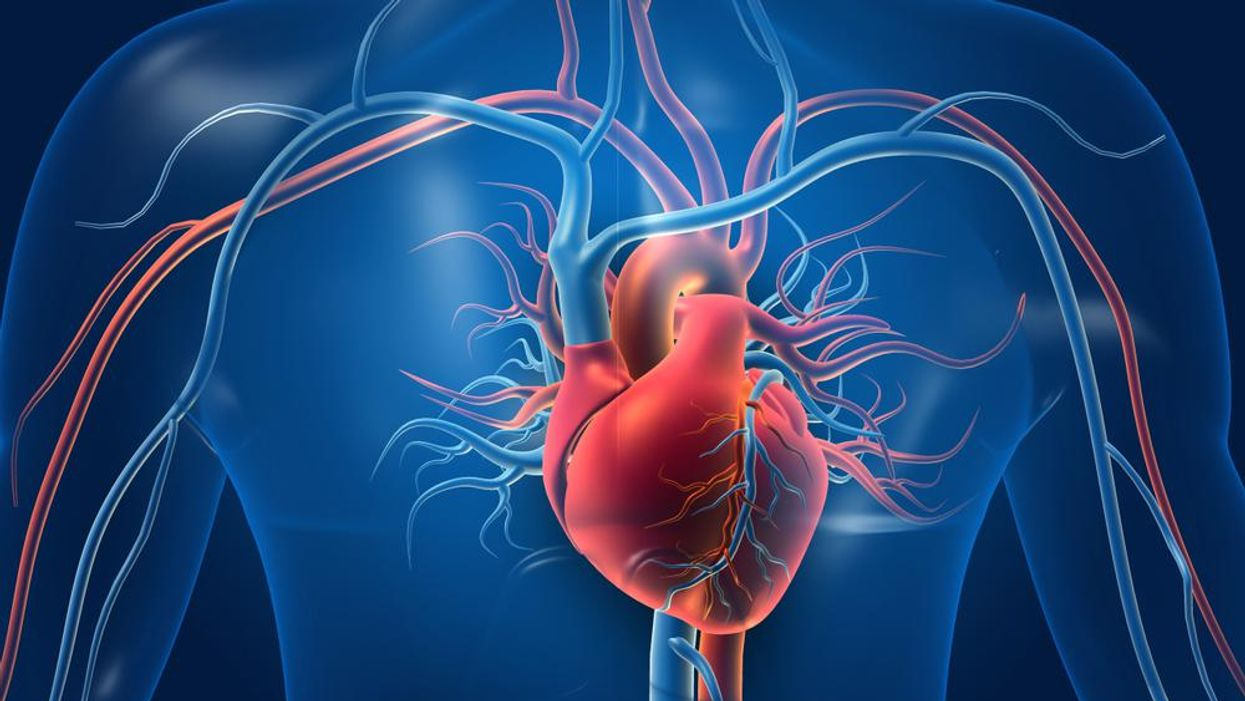

#**INTRODUCTION: A MUST READ**

####Cardiovascular diseases (CVDs) are a group of disorders of the heart and blood vessels.According to a report by WHO updated in June, 2021:

*   **Cardiovascular diseases (CVDs) are the leading cause of death globally.**

*  **An estimated 17.9 million people died from CVDs in 2019, representing 32% of all global deaths. Of these deaths, 85% were due to heart attack and stroke.**

*   **Over three quarters of CVD deaths take place in low- and middle-income countries.**

####Although there are various kinds of cardiovascular disease like coronary heart disease(CHD), cerebrovascular disease, peripheral arterial disease, rheumatic heart disease, congenital heart disease, deep vein thrombosis and pulmonary embolism. But our main focus for this analysis will be CHD only.

####Coronary heart disease is the term that describes what happens when your heart's blood supply is blocked or interrupted by a build-up of fatty substances in the coronary arteries.

####Over time, the walls of your arteries can become furred up with fatty deposits. This process is known as atherosclerosis and the fatty deposits are called atheroma.

####Atherosclerosis can be caused by lifestyle factors, such as smoking and regularly drinking excessive amounts of alcohol, unhealthy diet and physical inactivity.

####You're also more at risk of getting atherosclerosis if you have conditions like high cholesterol, high blood pressure (hypertension) or diabetes.

####Coronary heart disease cannot be cured but treatment can help manage the symptoms and reduce the chances of problems such as heart attacks.

####Treatment can include :

####lifestyle changes, such as regular exercise and stopping smoking, medicines, angioplasty – where balloons and stents are used to treat narrow heart arteries surgery.

#**So, where does machine learning fit it ?**

####Due to the multi-contributory risk factors such as high blood pressure, high cholestrol, diabetes and various others it gets very constrained  to identify the risk factors for some of the patients. That's we are turning to data mining and machine learning for predicting the disease to avert the risks.

####Machine learning (ML), due to its distinction in pattern detection and classification, proves to be effective in assisting decision making and risk assesment from the large quantity of data produced by the healthcare industry on heart disease.






## <b> Problem Description </b>


####The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includesover 4,000 records and 15 attributes.

##**Variables**

####Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.


##**Data Description**

##***Demographic***

• **Sex**: male or female("M" or "F")

• **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated towhole numbers, the concept of age is continuous)

##***Behavioral***

• **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")

• **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

##***Medical( history)***

• **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)

• **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)

• **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)

• **Diabetes**: whether or not the patient had diabetes (Nominal)

##***Medical(current)***

• **Tot Chol**: total cholesterol level (Continuous)

• **Sys BP**: systolic blood pressure (Continuous)

• **Dia BP**: diastolic blood pressure (Continuous)

• **BMI**: Body Mass Index (Continuous)

• **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• **Glucose**: glucose level (Continuous)

##***Predict variable (desired target)***

• **TenYearCHD**: 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

#**Setting the stage for our dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Copy of data_cardiovascular_risk.csv'

In [4]:
df = pd.read_csv(file_path)

In [5]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


##We don't need the education and id columns for analysis and models as they are not relevant so we will remove them.

In [6]:
df.drop(columns=['education','id'],inplace = True)

In [7]:
df.shape

(3390, 15)

In [8]:
df.describe()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   sex              3390 non-null   object 
 2   is_smoking       3390 non-null   object 
 3   cigsPerDay       3368 non-null   float64
 4   BPMeds           3346 non-null   float64
 5   prevalentStroke  3390 non-null   int64  
 6   prevalentHyp     3390 non-null   int64  
 7   diabetes         3390 non-null   int64  
 8   totChol          3352 non-null   float64
 9   sysBP            3390 non-null   float64
 10  diaBP            3390 non-null   float64
 11  BMI              3376 non-null   float64
 12  heartRate        3389 non-null   float64
 13  glucose          3086 non-null   float64
 14  TenYearCHD       3390 non-null   int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 397.4+ KB


In [10]:
#dealing with the null values
def missing_values(df):

  #total of missing values for each column
  total_missing_value = df.isna().sum()

  #percentage of missing values 
  percent_missing_value = total_missing_value*100/len(df)

  #making a table of the above results
  table = pd.concat([total_missing_value,percent_missing_value],axis = 1)

  #renaming the columns
  table.rename(columns = {0:'missing values',1:'percent of missing values'},inplace = True)

  #sorting the table in decreasing order by percentage of missing values
  missing_values_table = table.sort_values('percent of missing values',ascending = False).round(1)

  return missing_values_table

In [11]:
missing_values(df)

,missing values,percent of missing values
glucose,304,9.0
BPMeds,44,1.3
totChol,38,1.1
cigsPerDay,22,0.6
BMI,14,0.4
heartRate,1,0.0
age,0,0.0
sex,0,0.0
is_smoking,0,0.0
prevalentStroke,0,0.0


##Close to 12 percent null values are there so we will drop them as machine learning models do not support data with missing values.

In [12]:
df.dropna(axis=0, inplace=True)


In [13]:
#checking for numeric features
numeric_features = df.describe().columns
numeric_features

Index(['age', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD'],
      dtype='object')

In [14]:
#checking for categorical features
categorical_features = df.describe(include=['object','category']).columns
categorical_features

Index(['sex', 'is_smoking'], dtype='object')

In [15]:
df['TenYearCHD'].value_counts()

0    2547
1     457
Name: TenYearCHD, dtype: int64

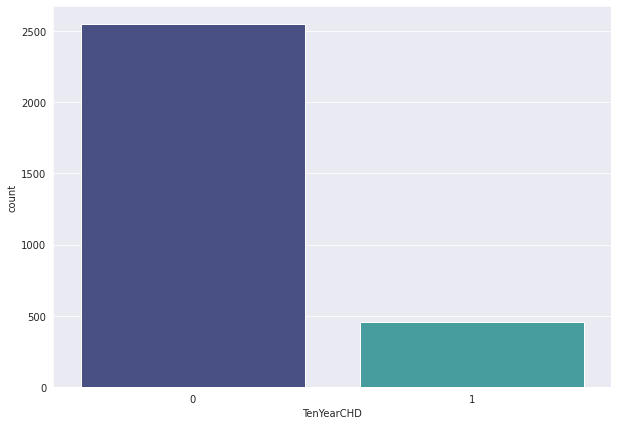

In [16]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.countplot(x='TenYearCHD',data=df,palette='mako')
plt.show()

##This is quite an imbalanced data as the number of people without the disease greatly outnumber the people who have the disease.

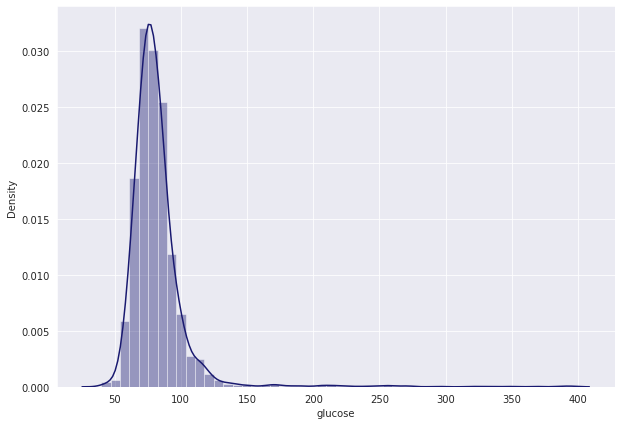

In [17]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.distplot(df['glucose'],color="midnightblue")
plt.show()

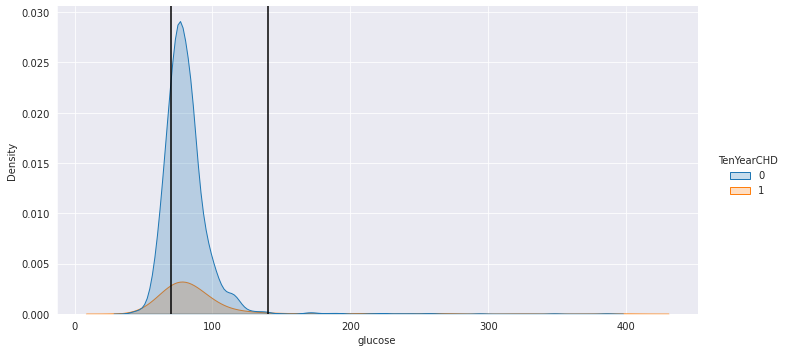

In [56]:
sns.displot(data=df, x='glucose', hue='TenYearCHD', kind='kde', fill=True, height=5, aspect=2)
plt.axvline(70, 0,1,color='black')
plt.axvline(140, 0,1,color='black')
plt.show()

##The normal glucose ranges from 70 mg/dL to 140 mg/dL given at what time of the day it was done whether it was before meal, after meal, during fasting or before bedtime.
##It is clear from the distriubution that there has been cases with glucose level as low as 20 mg/dL to 25 mg/dL and as high as 400 mg/dL to 440 mg/dL.
##Also we can see that the glucose level is touching the high and the low value for both the cases whether the risk of coronary heart disease is yes or no.

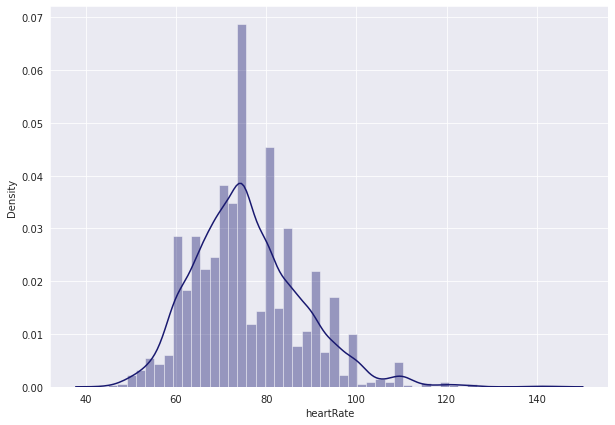

In [19]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.distplot(df['heartRate'],color="midnightblue")
plt.show()

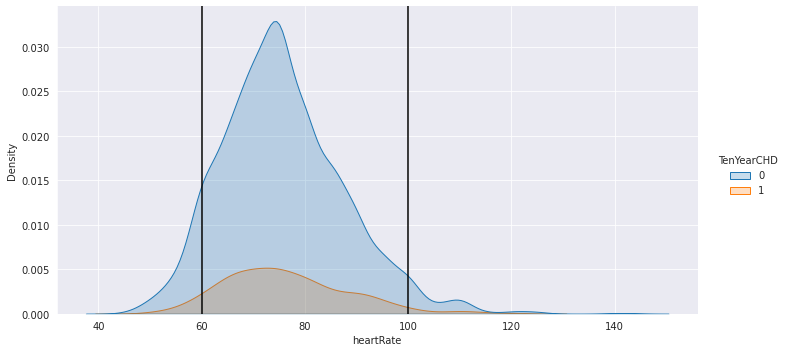

In [57]:
sns.displot(data=df, x='heartRate', hue='TenYearCHD', kind='kde', fill=True, height=5, aspect=2)
plt.axvline(60, 0,1,color='black')
plt.axvline(100, 0,1,color='black')
plt.show()

##Resting healthy heart rate for a normal human body is between 60 bpm to 100 bpm but in our dataset it ranges between 38 bpm to 155 bpm.
##In patients with known coronary heart disease, elevated heart rate reduces diastolic filling time and increases cardiac workload, resulting in supply demand mismatch with consequent ischemia(condition in which the blood flow (and thus oxygen) is restricted or reduced in a part of the body) and angina(chest pain caused by reduced blood flow to the heart).
##Surprisingly in our dataset no conclusion can be made to distinguish between the people who are at risk of CHD or not at risk as for both categories of people the heart rate varies in a similar way. 

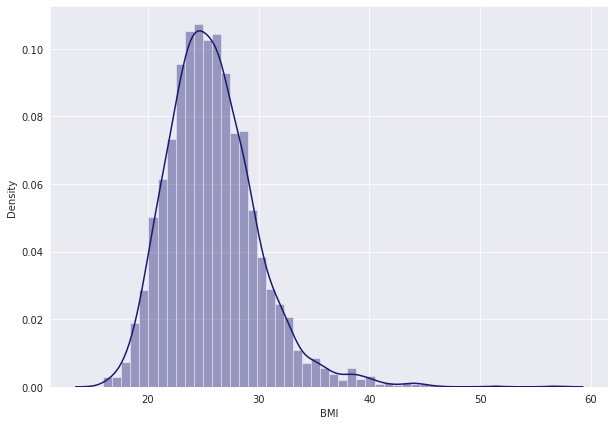

In [21]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.distplot(df['BMI'],color="midnightblue")
plt.show()

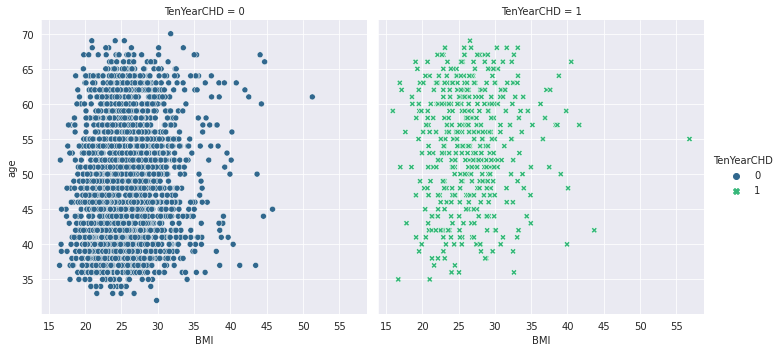

In [22]:
sns.set_style("darkgrid")
sns.relplot(data=df, x="BMI", y="age",hue="TenYearCHD",col='TenYearCHD',style='TenYearCHD',kind="scatter",palette='viridis')
plt.show()

##BMI in our dataset ranges in between 15 to almost 60. 
###People with BMI in the range 18.5 to 24.9 are considered healthy, 25.0 to 29.9 as overweight and after 30.0 are classified as obese.
##People with risk of coronary heart disease are spread quite evenly. 
##So there must be other factors other than BMI that are contributing to the potential risk of coronary heart disease.We have cases where people are in the category of obese but still not at risk of CHD and a lot of people in the category of healthy but still at the risk of CHD.

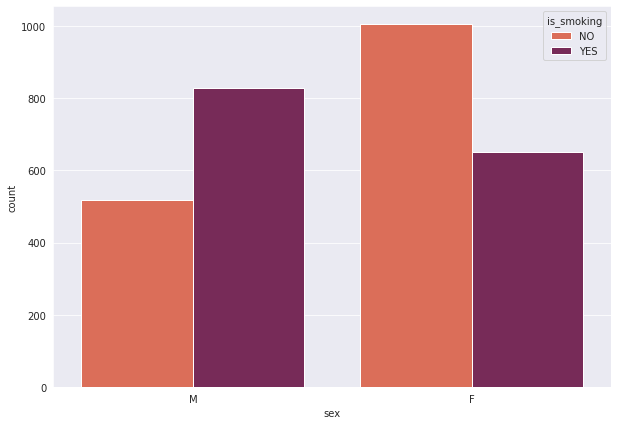

In [23]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.countplot(x='sex',data=df,hue='is_smoking',palette='rocket_r')
plt.show()

##Does smoking add to the risk of CHD?
## It is an unhealthy habit for starters and comparatively CHD is quite common in people with unhealthy food habits, drug abuse, tobacco use and others. 
##Males who smoke are at greater risk of CHD compared to females.
##Moreover, males who smoke are at greater risk of CHD in comparison to non smokers.

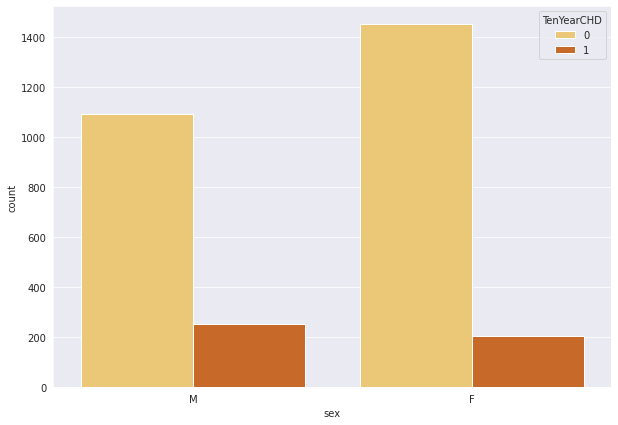

In [24]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.countplot(x='sex',data=df,hue='TenYearCHD',palette='YlOrBr')
plt.show()

##Our dataset has close to 1250 males and 1650 females.And the proportion of TenYearCHD = 1 is more inclined towards males even though the females are in majority in our dataset.

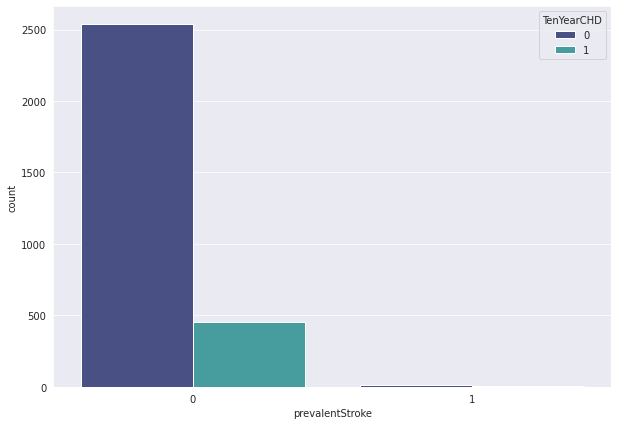

In [25]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.countplot(x='prevalentStroke',hue='TenYearCHD',data=df,palette='mako')
plt.show()

##Cases with positive prevalant stroke are very negligible in our dataset. It would be immature to make any hard assumptions from this variable.
##People who didn't have prevalant stroke have cases where the risk of CHD is positive. people with both prevalant stroke and TenYearCHD as 1 are very few in number.

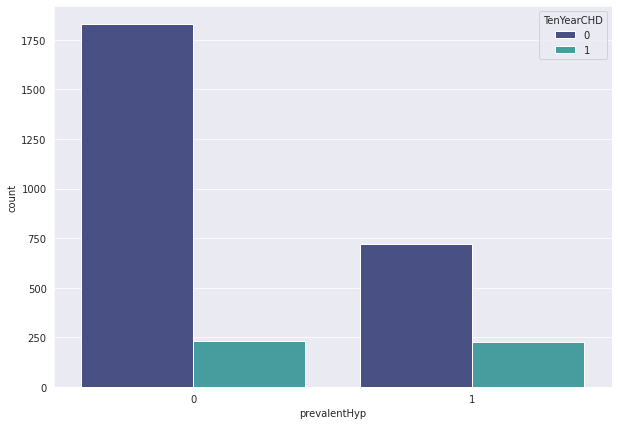

In [26]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.countplot(x='prevalentHyp',hue='TenYearCHD',data=df,palette='mako')
plt.show()

##The excess strain and resulting damage from hypertension causes the coronary arteries serving the heart to slowly become narrowed from a buildup of fat, cholesterol and other substances that together are called plaque. This leads to narrowed artery which limits or blocks the flow of blood to the heart muscle, which means it might not get enough oxygen. 
##We can see that most of the people who have hypertension are at risk of coronary heart disease.Hypertension is one of the contributing factors to the risk of CHD.
##There are cases where hypertension is not there but the risk of CHD is still present.

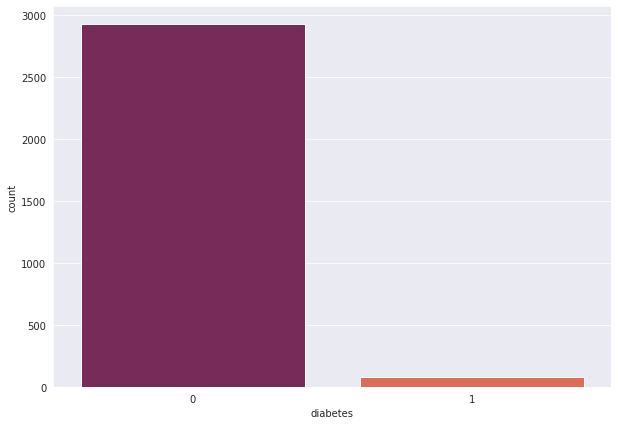

In [27]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.countplot(x='diabetes',data=df,palette='rocket')
plt.show()

##Most of the people in our dataset are not diabetic and very few are in number who have diabetes.

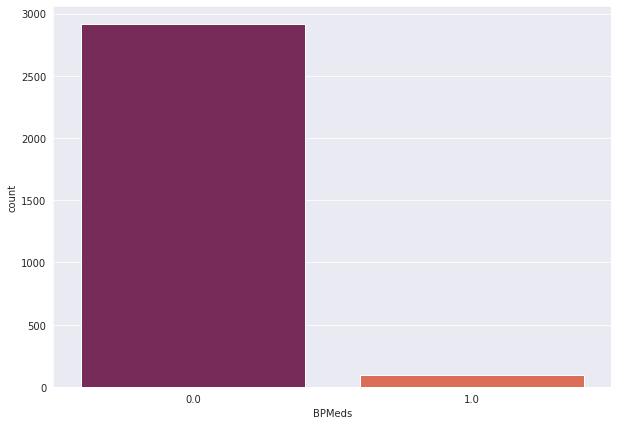

In [28]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.countplot(x='BPMeds',data=df,palette='rocket')
plt.show()

##Quite clearly visible that very less number of people are on BP medication.

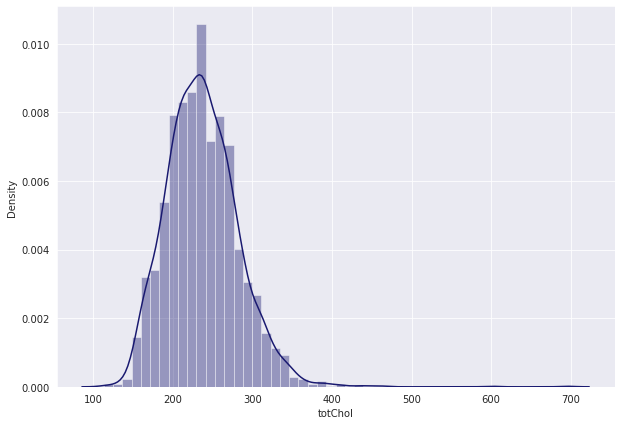

In [29]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.distplot(df['totChol'],color="midnightblue")
plt.show()

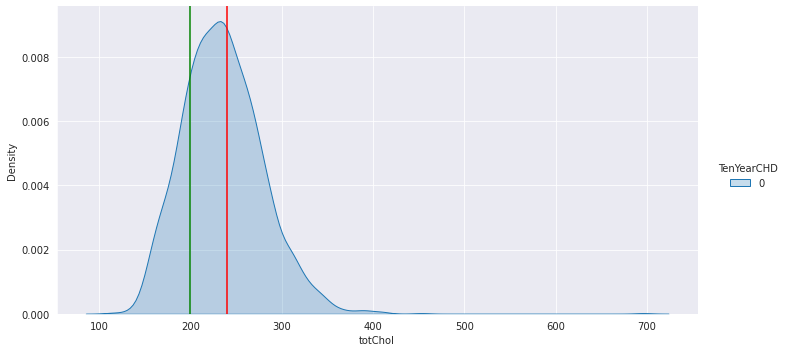

In [58]:
zero_tc = df[df['TenYearCHD']==0]
sns.displot(data=zero_tc, x='totChol', hue='TenYearCHD', kind='kde', fill=True, height=5, aspect=2)
plt.axvline(200, 0,1,color='green')
plt.axvline(240, 0,1,color='red')
plt.show()

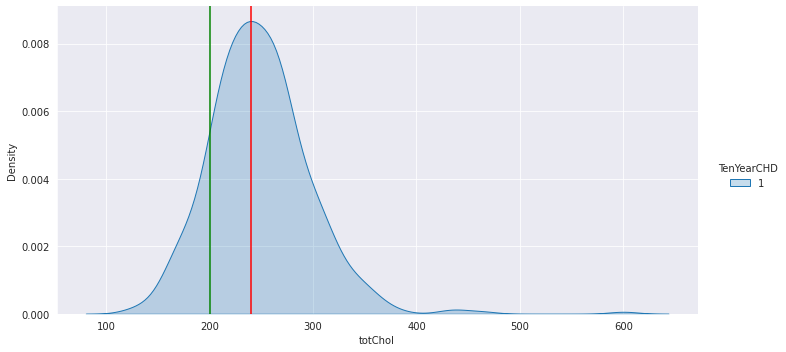

In [59]:
one_tc = df[df['TenYearCHD']==1]
sns.displot(data=one_tc, x='totChol', hue='TenYearCHD', kind='kde', fill=True, height=5, aspect=2)
plt.axvline(200, 0,1,color='green')
plt.axvline(240, 0,1,color='red')
plt.show()

##Total cholesterol includes low-density lipoprotein (**bad**) cholesterol and high-density lipoprotein (**good**) cholesterol.
##Less than 200 mg/dL is desirable level, 200 - 239 mg/dL is borderline high level and 240 mg/dL and above comes in the category of high level.
##In our dataset most of the people are either in the borderline area(between green and red vertical line) or in the high level(beyond red line).
##People who are at risk of CHD have total cholestrol ranging from less than 100 mg/dL to 700 mg/dL almost.

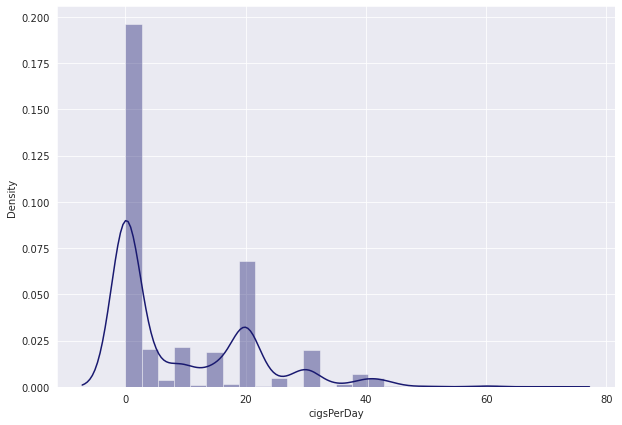

In [30]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.distplot(df['cigsPerDay'],color="midnightblue")
plt.show()

##Most of the people in our dataset do not smoke and then after that there are people who smoke 20 cigarettes a day.
##The graph ranges from 0 cigarettes to 70 cigarettes a day which is very high quantity.

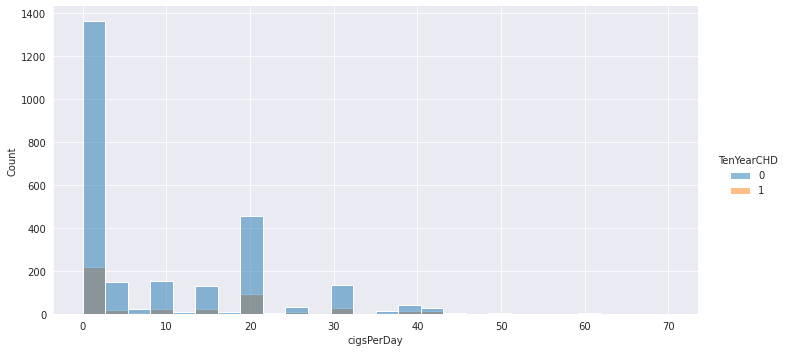

In [64]:
sns.displot(data=df, x='cigsPerDay', hue='TenYearCHD', fill=True, height=5, aspect=2)
plt.show()

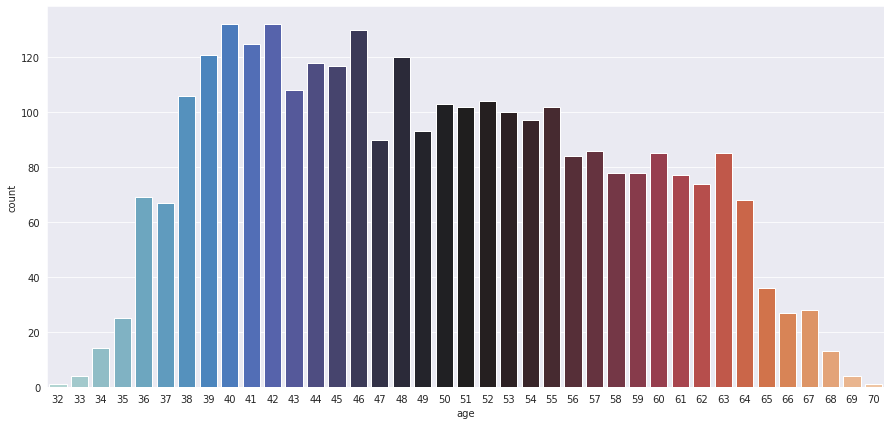

In [32]:
plt.figure(figsize=(15,7))
sns.set_style("darkgrid")
sns.countplot(df['age'],palette="icefire")
plt.show()

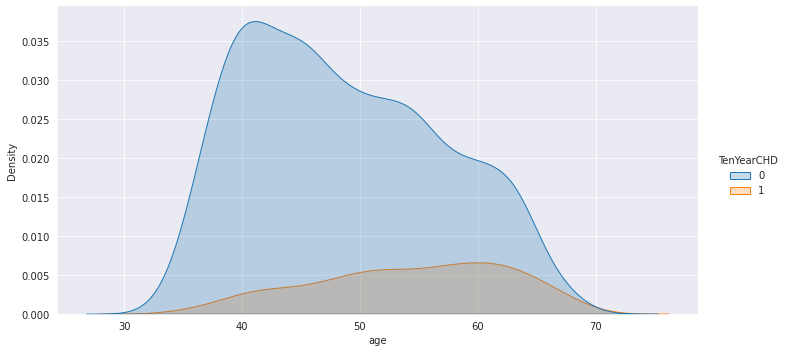

In [33]:
sns.displot(data=df, x='age', hue='TenYearCHD', kind='kde', fill=True, height=5, aspect=2)
plt.show()

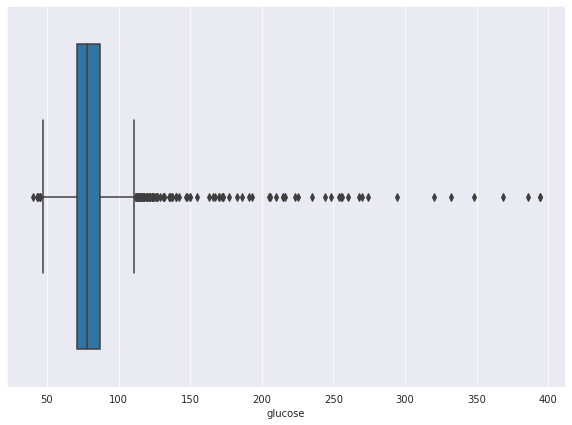

In [34]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.boxplot(df['glucose'], orient='horizontal')
plt.show()

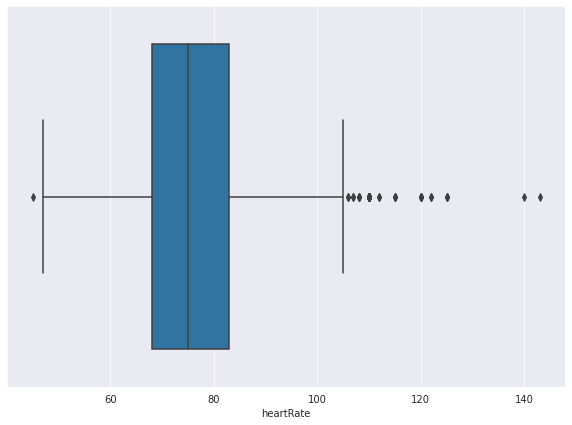

In [35]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.boxplot(df['heartRate'], orient='horizontal')
plt.show()

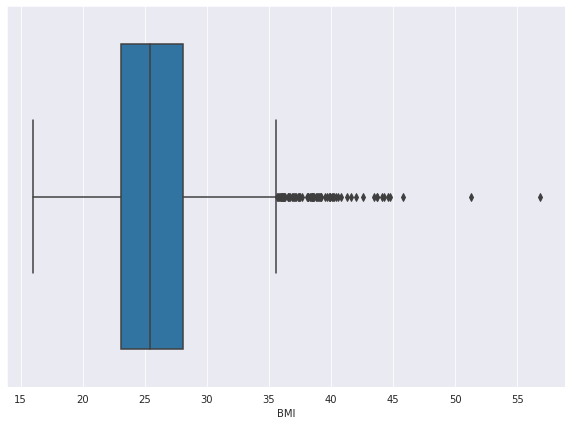

In [36]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.boxplot(df['BMI'], orient='horizontal')
plt.show()

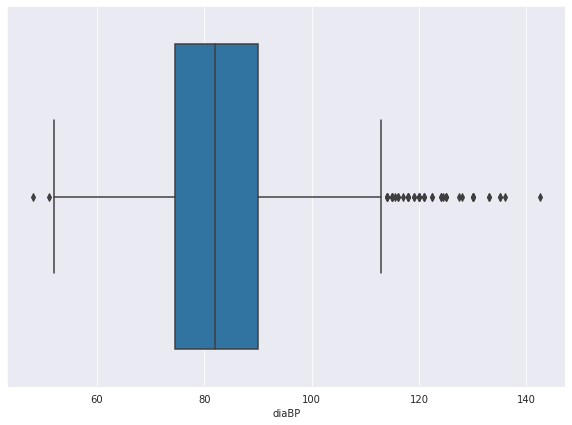

In [37]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.boxplot(df['diaBP'], orient='horizontal')
plt.show()

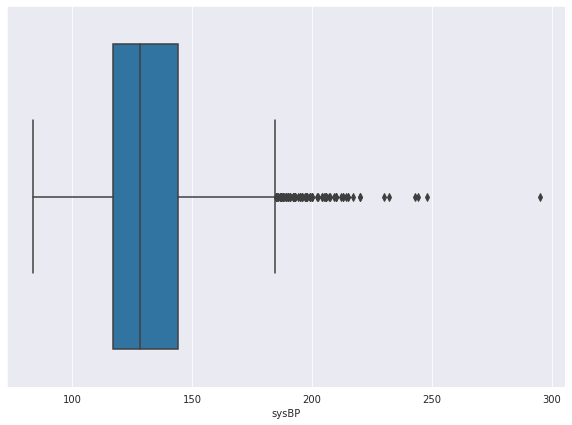

In [38]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.boxplot(df['sysBP'], orient='horizontal')
plt.show()

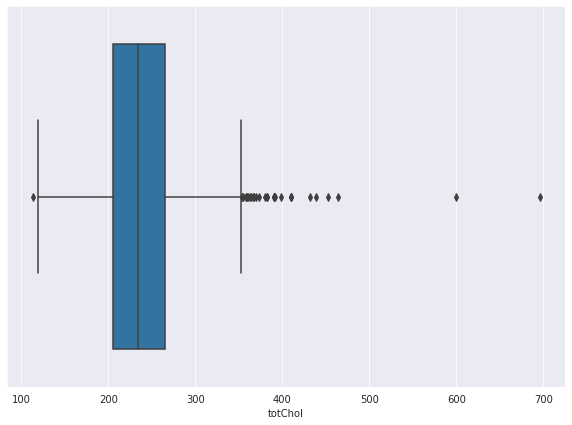

In [39]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.boxplot(df['totChol'], orient='horizontal')
plt.show()

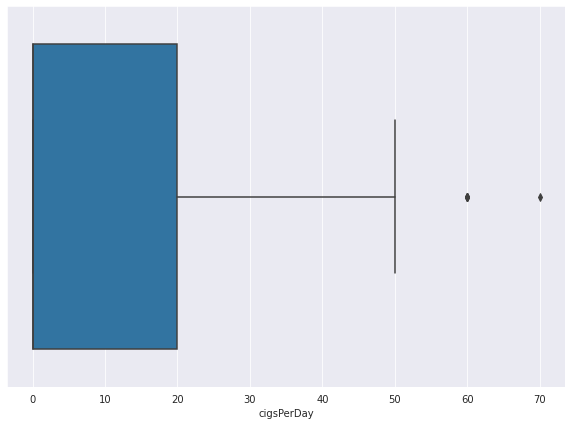

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.boxplot(df['cigsPerDay'], orient='horizontal')
plt.show()

In [ ]:
df = pd.get_dummies(df,columns=['sex','is_smoking'])

In [ ]:
df.head()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_F,sex_M,is_smoking_NO,is_smoking_YES
1,36,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,0,1,1,0
2,46,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,0,0,1
3,50,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,0,1,0,1
4,64,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,1,0,0,1
5,61,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,1,0,1,0


In [ ]:
df.columns

Index(['age', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD', 'sex_F', 'sex_M', 'is_smoking_NO', 'is_smoking_YES'],
      dtype='object')

In [ ]:
df.shape

(3004, 17)